#### Importing libraries and Data

In [2]:
import pandas as pd
import sqlite3
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
conn = sqlite3.connect('data/etl.db')
query = 'SELECT * FROM news'
df = pd.read_sql(query, conn)
conn.close()

OperationalError: unable to open database file

In [4]:
df.head()

,headlines,link,date_time,article_id,language,region,ceid
0,"Ohio Rejects Issue 1, Constitutional Change In...",{'https://news.google.com/topics/articles/CBMi...,2023-08-09 03:17:58+00:00,CBMiSGh0dHBzOi8vd3d3Lm55dGltZXMuY29tLzIwMjMvMD...,en-US,US,US:en'}
1,Ohio special election and what it could mean f...,{'https://news.google.com/topics/articles/CCAi...,2023-08-09 00:00:01+00:00,CCAiCzNGMzZPVk1oNWljmAEB,en-US,US,US:en'}
2,Editorial: Ohio at a crossroad | The Blade,{'https://news.google.com/topics/articles/CBMi...,2023-08-08 04:02:58+00:00,CBMiaWh0dHBzOi8vd3d3LnRvbGVkb2JsYWRlLmNvbS9vcG...,en-US,US,US:en'}
3,Commentary: Ohio's GOP just learned voters are...,{'https://news.google.com/topics/articles/CBMi...,2023-08-09 02:27:00+00:00,CBMiSmh0dHBzOi8vd3d3Lnd2eHUub3JnL3BvbGl0aWNzLz...,en-US,US,US:en'}
4,Judge schedules Friday hearing on protective o...,{'https://news.google.com/topics/articles/CBMi...,2023-08-08 23:56:00+00:00,CBMiUWh0dHBzOi8vd3d3LmNubi5jb20vMjAyMy8wOC8wOC...,en-US,US,US:en'}


#### Word Cloud: Created a word cloud of the most frequent words in the headlines to visually represent the most common topics or themes covered in the news.

In [5]:
text = ' '.join(df['headlines'])

In [6]:
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10,
                      colormap='viridis'
                      ).generate(text)

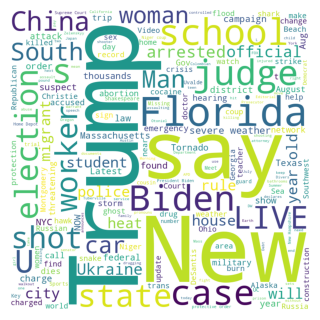

In [7]:
plt.figure(figsize=(8, 3), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

#### Sentiment Analysis: Performed sentiment analysis on the headlines to understand the overall sentiment of the news articles (e.g., positive, negative, neutral) and track sentiment trends over time.

In [8]:
def get_sentiment_category(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [9]:
df['sentiment_polarity'] = df['headlines'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_category'] = df['sentiment_polarity'].apply(get_sentiment_category)

In [10]:
df.head()

,headlines,link,date_time,article_id,language,region,ceid,sentiment_polarity,sentiment_category
0,"Ohio Rejects Issue 1, Constitutional Change In...",{'https://news.google.com/topics/articles/CBMi...,2023-08-09 03:17:58+00:00,CBMiSGh0dHBzOi8vd3d3Lm55dGltZXMuY29tLzIwMjMvMD...,en-US,US,US:en'},0.000000,neutral
1,Ohio special election and what it could mean f...,{'https://news.google.com/topics/articles/CCAi...,2023-08-09 00:00:01+00:00,CCAiCzNGMzZPVk1oNWljmAEB,en-US,US,US:en'},0.022321,positive
2,Editorial: Ohio at a crossroad | The Blade,{'https://news.google.com/topics/articles/CBMi...,2023-08-08 04:02:58+00:00,CBMiaWh0dHBzOi8vd3d3LnRvbGVkb2JsYWRlLmNvbS9vcG...,en-US,US,US:en'},0.000000,neutral
3,Commentary: Ohio's GOP just learned voters are...,{'https://news.google.com/topics/articles/CBMi...,2023-08-09 02:27:00+00:00,CBMiSmh0dHBzOi8vd3d3Lnd2eHUub3JnL3BvbGl0aWNzLz...,en-US,US,US:en'},0.000000,neutral
4,Judge schedules Friday hearing on protective o...,{'https://news.google.com/topics/articles/CBMi...,2023-08-08 23:56:00+00:00,CBMiUWh0dHBzOi8vd3d3LmNubi5jb20vMjAyMy8wOC8wOC...,en-US,US,US:en'},0.000000,neutral
